In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, losses, Sequential
print(tf.version.VERSION)

2.3.0


In [77]:
path = 'Datasets\COVID-19 CT Scan Images\Original CT Scans'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(path,
                                                              labels='inferred',
                                                              label_mode='int',
                                                              color_mode='rgb',
                                                              image_size=(300,300),
                                                              batch_size=32,
                                                              validation_split=0.3,
                                                              subset='training',
                                                              shuffle=True,
                                                              seed=123         
                                                           )


Found 19685 files belonging to 3 classes.
Using 13780 files for training.


In [78]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(path,
                                                              labels='inferred',
                                                              label_mode='int',
                                                              color_mode='rgb',
                                                              image_size=(300,300),
                                                              batch_size=32,
                                                              validation_split=0.02,
                                                              subset='validation',
                                                              shuffle=True,
                                                              seed=123         
                                                              )

Found 19685 files belonging to 3 classes.
Using 393 files for validation.


In [79]:
path = 'Datasets\COVID-19 CT Scan Images\Original CT Scans'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(path,
                                                              labels='inferred',
                                                              label_mode='int',
                                                              color_mode='rgb',
                                                              image_size=(300,300),
                                                              batch_size=32,
                                                              validation_split=0.02,
                                                              subset='validation',
                                                              shuffle=True,
                                                              seed=123         
                                                              )

Found 19685 files belonging to 3 classes.
Using 393 files for validation.


In [80]:
class_names = train_ds.class_names
print(class_names)

['NiCT', 'nCT', 'pCT']


In [ ]:
        # Sample Images of Dataset
images, labels = next(iter(train_ds))   
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i*i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    
    plt.subplot(4,4,i+1+4)
    plt.imshow(images[i*i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    
    
    

In [ ]:
# Image Resizing plot
path = 'Datasets\COVID-19 CT Scan Images\Original CT Scans'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(path,
                                                              labels='inferred',
                                                              label_mode='int',
                                                              color_mode='rgb',
                                                              image_size=(512,512),
                                                              batch_size=32,
                                                              validation_split=0.3,
                                                              subset='training',
                                                              shuffle=True,
                                                              seed=123         
                                                           )

import numpy as np
import matplotlib.pyplot as plt
with tf.device('CPU'):
    
    images, labels = next(iter(train_ds))   
 
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(images[1].numpy()/255.0)
    plt.axis('on')
          
    new_img = tf.keras.layers.experimental.preprocessing.Resizing(300,300)(images[1])
    plt.subplot(1,3,2)
    plt.imshow(new_img.numpy()/255.0)
    print("new shape",new_img.shape)
    

In [ ]:
# Convolution on Single Image
with tf.device('CPU'):
    import numpy as np
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    i,l = next(iter(train_ds))
    img = i[1]
    img = tf.expand_dims(img,0)
    print(np.max(img), np.min(img))

    x=tf.keras.layers.Conv2D(1,3,activation='relu',input_shape=(321,321,3))(img)
    plt.subplot(1,2,1)
    plt.imshow(i[1].numpy()/255.0)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(tf.squeeze(x))
    plt.axis('off')
    print(tf.squeeze(x).shape)

In [341]:
print(images.shape)

(32, 300, 300, 3)


In [58]:
INPUT_SIZE = (300,300,3)
RESCALE_FACTOR = 1./255

with tf.device('CPU'):
    INPUT_LAYER = layers.Input(shape=INPUT_SIZE, name='Input_Layer')
    x = tf.keras.layers.experimental.preprocessing.Rescaling(RESCALE_FACTOR)(INPUT_LAYER)
    x = tf.keras.layers.Conv2D(1, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(2, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    
    x = tf.keras.layers.Conv2D(2, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(8)(x)
    x = tf.keras.layers.Dense(16)(x)
    OUTPUT_LAYER = tf.keras.layers.Dense(3, activation='softmax', name='Output_Layer')(x)
    model = tf.keras.Model(inputs=INPUT_LAYER, outputs=OUTPUT_LAYER, name='COVID_19_Classifier')
    print(model.summary())
    

Model: "COVID_19_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 300, 1)       28        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 2)       20        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 2)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 2) 

In [351]:
#tf.keras.utils.plot_model(model, to_file='Covid_model_plot.png', show_shapes=True, show_layer_names=True,
#    rankdir='TB', expand_nested=False, dpi=350)

In [81]:
with tf.device('CPU'):
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  
                  metrics=['accuracy'])

In [82]:
with tf.device('CPU'):
    N_EPOCHS=20
    train_ds=train_ds.repeat(3)
    history = model.fit(train_ds, epochs=N_EPOCHS, validation_data=val_ds, steps_per_epoch=30, shuffle=True)
    

Epoch 1/20
30/30 [==============================] - 30s 1000ms/step - loss: 1.0138 - accuracy: 0.5250 - val_loss: 0.9636 - val_accuracy: 0.5318
Epoch 2/20
30/30 [==============================] - 35s 1s/step - loss: 0.8899 - accuracy: 0.6500 - val_loss: 0.8145 - val_accuracy: 0.7354
Epoch 3/20
30/30 [==============================] - 33s 1s/step - loss: 0.8064 - accuracy: 0.7427 - val_loss: 0.7942 - val_accuracy: 0.7557
Epoch 4/20
30/30 [==============================] - 35s 1s/step - loss: 0.7698 - accuracy: 0.7812 - val_loss: 0.7849 - val_accuracy: 0.7659
Epoch 5/20
30/30 [==============================] - 34s 1s/step - loss: 0.7824 - accuracy: 0.7667 - val_loss: 0.7825 - val_accuracy: 0.7735
Epoch 6/20
30/30 [==============================] - 35s 1s/step - loss: 0.7679 - accuracy: 0.7792 - val_loss: 0.7810 - val_accuracy: 0.7735
Epoch 7/20
30/30 [==============================] - 34s 1s/step - loss: 0.7528 - accuracy: 0.7979 - val_loss: 0.7320 - val_accuracy: 0.8422
Epoch 8/20
30/30

In [93]:
#model.save("Saved_Models/Final_Covid_Model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved_Models/Final_Covid_Model\assets


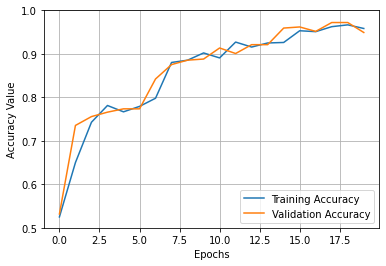

In [85]:
import matplotlib.pyplot as plt

#print(history.history.keys())
#plt.figure(figsize=(8,5))
n_epochs=range(N_EPOCHS)
plt.plot(n_epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(n_epochs, history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.ylim((0.5,1))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


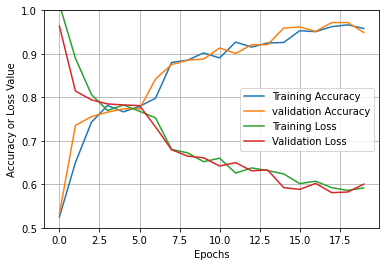

In [86]:
import matplotlib.pyplot as plt

print(history.history.keys())
#plt.figure(figsize=(20,10))
n_epochs=range(N_EPOCHS)
plt.plot(n_epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(n_epochs, history.history['val_accuracy'], label='validation Accuracy')

plt.plot(n_epochs, history.history['loss'], label='Training Loss')
plt.plot(n_epochs, history.history['val_loss'], label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Accuracy or Loss Value")
plt.ylim((0.5,1))
plt.legend(loc='center right')
plt.grid(True)
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


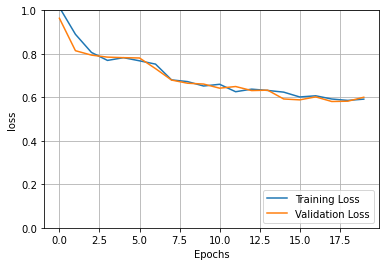

In [87]:
import matplotlib.pyplot as plt

print(history.history.keys())
n_epochs=range(N_EPOCHS)
plt.plot(n_epochs, history.history['loss'], label='Training Loss')
plt.plot(n_epochs, history.history['val_loss'], label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("loss")
plt.ylim((0,1))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [88]:
with tf.device('CPU'):
    loss, acc = model.evaluate(test_ds)
    print("\nTesting Data Accuracy %.2f"%(acc*100),"%")
    print("Testing Data loss %.2f" %(loss*100),"%")

13/13 [==============================] - 4s 299ms/step - loss: 0.6004 - accuracy: 0.9491

Testing Data Accuracy 94.91 %
Testing Data loss 60.04 %


In [92]:
import numpy as np
with tf.device('CPU'):
    def model_accuracy(ds):
        i, l = next(iter(ds))
        pred=model.predict(i)
        res=[np.argmax(x) for x in pred]
        cnf=tf.math.confusion_matrix(res,l)
        print("------------Confusion Matrix--------\n")
        print(cnf.numpy(),"\n")
        R=[]
        P=[]
        row_sum=np.sum(cnf,axis=1)
        col_sum=np.sum(cnf,axis=0)
        class_names=['NiCT', 'nCT', 'pCT']
        print("------------MODEL ACCURACY--------\n")
        print("{0:16s} {1:15s} {2:10s}\n".format("Class_Names","Precision","Recall"))
        for k in range(3):   
            R.append(cnf[k][k]/row_sum[0])
            P.append(cnf[k][k]/col_sum[0])
            print("  {0:15s} {1:4f} {2:14f}".format(class_names[k],P[k],R[k]))

    
    model_accuracy(test_ds)

------------Confusion Matrix--------

[[ 9  0  0]
 [ 0 12  2]
 [ 0  0  9]] 

------------MODEL ACCURACY--------

Class_Names      Precision       Recall    

  NiCT            1.000000       1.000000
  nCT             1.333333       1.333333
  pCT             1.000000       1.000000
